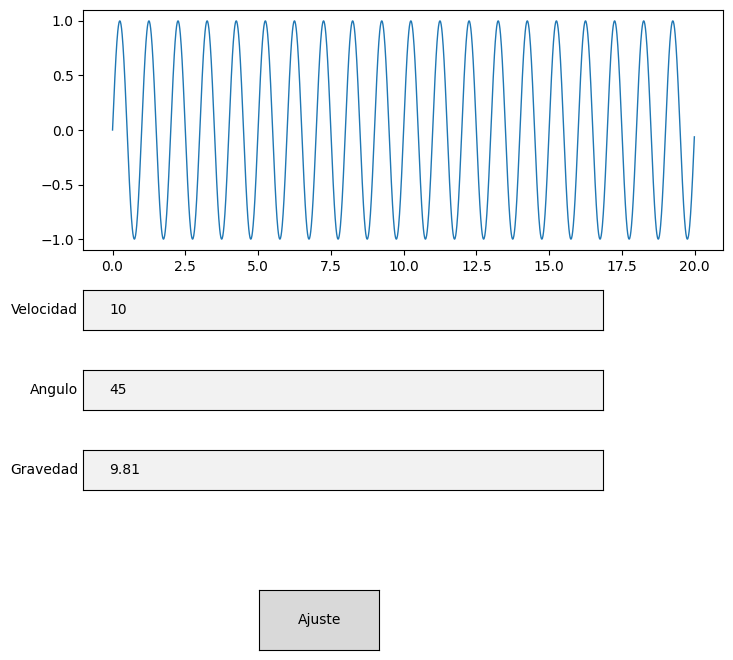

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.widgets import Button, TextBox

%matplotlib

fig, ax = plt.subplots(figsize=(8, 8))
fig.subplots_adjust(bottom=0.6, left=0.1, right=0.9, top=0.9)
t = np.arange(0.0, 20.0, 0.01)  
s = np.sin(2*np.pi*t)
l, = ax.plot(t, s, lw=1)

max_height_text = ax.text(0.5, 1.15, '', transform=ax.transAxes, ha='center', fontsize=10, color='red')
max_dist_text = ax.text(0.5, 1.05, '', transform=ax.transAxes, ha='center', fontsize=10, color='blue')

class Index:
    def __init__(self):
        self.launch_speed = 10
        self.launch_angle = 45
        self.gravity = 9.81

    def plot_trajectory(self, event):
        try:
            launch_speed = float(textbox_speed.text)
            launch_angle = float(textbox_angle.text)
            gravity = float(textbox_gravity.text)

            launch_angle_rad = np.deg2rad(launch_angle)
            x = launch_speed * t * np.cos(launch_angle_rad)
            y = launch_speed * t * np.sin(launch_angle_rad) - 0.5 * gravity * t ** 2

            l.set_xdata(x)
            l.set_ydata(y)
            max_height = np.max(y)
            max_dist = (launch_speed ** 2 * np.sin(2 * launch_angle_rad)) / gravity
            ax.set_ylim(0, max_height * 1.1)
            ax.set_xlim(0, max_dist * 1.1)
            max_height_text.set_text(f'Altura maxima: {max_height:.2f}')
            max_dist_text.set_text(f'Distancia maxima: {max_dist:.2f}')
            plt.draw()
        except ValueError:
            print("Ingresa valores numericos positivos.")

callback = Index()

ax_speed = fig.add_axes([0.1, 0.5, 0.65, 0.05])
ax_angle = fig.add_axes([0.1, 0.4, 0.65, 0.05])
ax_gravity = fig.add_axes([0.1, 0.3, 0.65, 0.05])
ax_button = fig.add_axes([0.32, 0.1, 0.15, 0.075])

textbox_speed = TextBox(ax_speed, 'Velocidad', initial='10')
textbox_angle = TextBox(ax_angle, 'Angulo', initial='45')
textbox_gravity = TextBox(ax_gravity, 'Gravedad', initial='9.81')
button_plot = Button(ax_button, 'Ajuste')

button_plot.on_clicked(callback.plot_trajectory)

plt.show()